In [10]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [17]:
dataset = pd.read_csv('harris.dat', header = None, delimiter=' ')  

In [20]:
dataset.head()

,0,1,2,3,4
0,3900,12,0.0,1,0
1,4020,10,44.0,7,0
2,4290,12,5.0,30,0
3,4380,8,6.2,7,0
4,4380,8,7.5,6,0


In [19]:
dataset.describe()  

,0,1,2,3,4
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,5420.322581,12.505376,101.034409,16.720430,0.344086
std,709.587222,2.282369,90.863875,10.254761,0.477644
min,3900.000000,8.000000,0.000000,1.000000,0.000000
25%,4980.000000,12.000000,36.000000,9.000000,0.000000
50%,5400.000000,12.000000,70.000000,15.000000,0.000000
75%,6000.000000,15.000000,144.000000,25.000000,1.000000
max,8100.000000,16.000000,381.000000,34.000000,1.000000


In [24]:
X = dataset.drop(0, axis=1) 
y = dataset[0]  

In [27]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [32]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(max_depth=3)  
regressor.fit(X_train, y_train)  

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [33]:
y_pred = regressor.predict(X_test) 

In [34]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df  

,Actual,Predicted
2,4290,4320.000000
30,5220,5366.250000
55,5700,5366.250000
16,4800,5366.250000
13,4800,4320.000000
51,5700,5366.250000
61,4620,6272.727273
45,5400,5366.250000
33,5280,4791.428571
77,6000,5200.000000


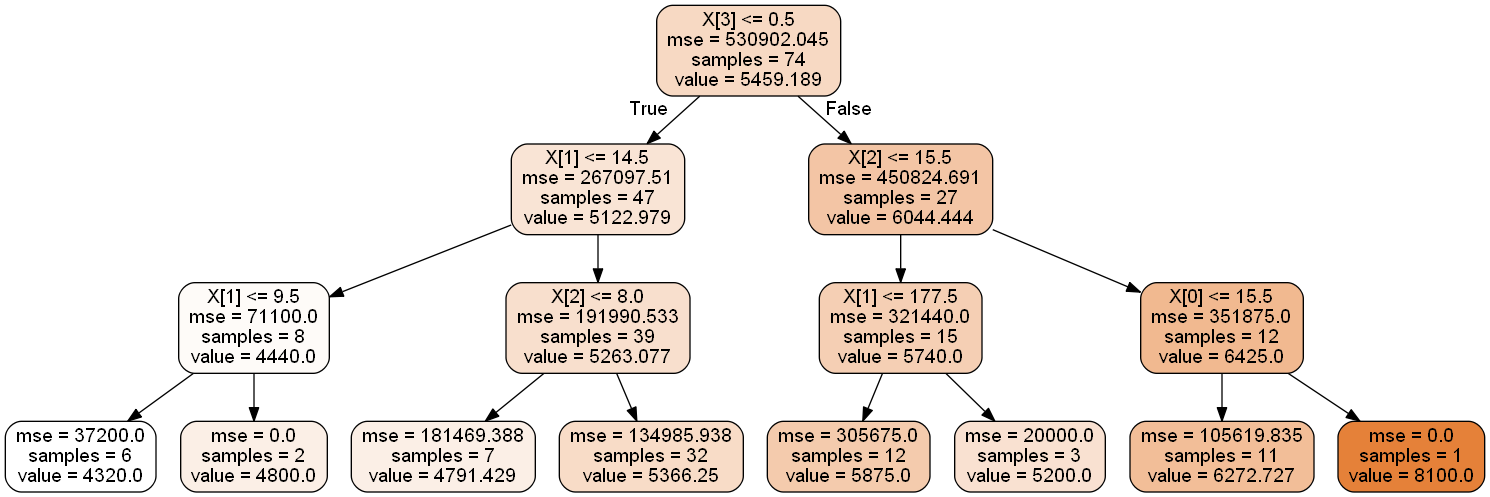

In [60]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [55]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)

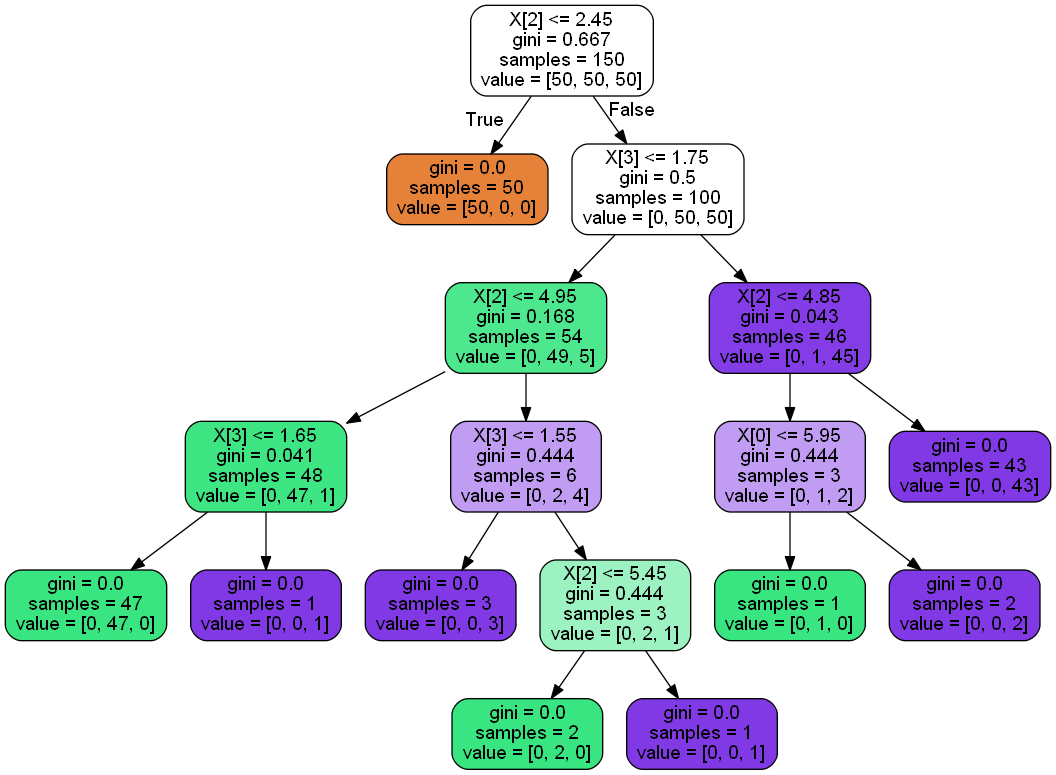

In [59]:
dot_data2 = StringIO()
export_graphviz(clf, out_file=dot_data2, filled=True, rounded=True)
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())